# Neural Networks with keras and tensorflow

N.B. You will need to pip install keras and tensorflow!

In [3]:
#!pip install keras

In [4]:
#!pip install tensorflow

In [5]:
from sklearn.datasets import load_breast_cancer
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

For this lesson we'll use sklearn's built-in breast cancer dataset. The next cell loads the data and prints the data description.

In [6]:
data = load_breast_cancer()
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [9]:
# Splitting our data and initializing a Scaler

X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
# Transforming our data

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## Constructing a Neural Network in Keras

In [14]:
# Importing model and layer types

from keras.models import Sequential
from keras.layers import Dense

from keras.optimizers import Adam

In [15]:
# Constructing and compiling our model

model = Sequential()

inputs = X_train.shape[1]
hiddens = inputs

model.add(Dense(hiddens, input_dim=inputs, activation="relu"))
model.add(Dense(1))

W0709 16:35:30.684036 4565669312 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0709 16:35:30.752408 4565669312 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0709 16:35:30.777712 4565669312 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [16]:
# Fitting our model

adam = Adam()

model.compile(optimizer=adam, loss="mean_squared_error")

W0709 16:40:53.896137 4565669312 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [20]:
# Storing that fit as a history log

model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=25)

W0709 16:44:15.107475 4565669312 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0709 16:44:15.182819 4565669312 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 426 samples, validate on 143 samples
Epoch 1/25
426/426 [==============================] - 0s 909us/step - loss: 0.8984 - val_loss: 0.5102
Epoch 2/25
426/426 [==============================] - 0s 80us/step - loss: 0.3976 - val_loss: 0.2587
Epoch 3/25
426/426 [==============================] - 0s 94us/step - loss: 0.2448 - val_loss: 0.1918
Epoch 4/25
426/426 [==============================] - 0s 76us/step - loss: 0.1848 - val_loss: 0.1568
Epoch 5/25
426/426 [==============================] - 0s 91us/step - loss: 0.1508 - val_loss: 0.1351
Epoch 6/25
426/426 [==============================] - 0s 76us/step - loss: 0.1304 - val_loss: 0.1229
Epoch 7/25
426/426 [==============================] - 0s 81us/step - loss: 0.1166 - val_loss: 0.1168
Epoch 8/25
426/426 [==============================] - 0s 103us/step - loss: 0.1069 - val_loss: 0.1100
Epoch 9/25
426/426 [==============================] - 0s 92us/step - loss: 0.0983 - val_loss: 0.1037
Epoch 10/25
426/426 [======================

In [22]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=50, verbose=0, batch_size=200)

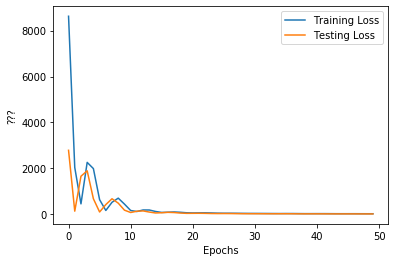

In [26]:
# Plotting our losses

train_loss = history.history["loss"]
test_loss = history.history["val_loss"]
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.xlabel("Epochs")
plt.ylabel("???")
plt.legend()
plt.show()

## Tensorflow

In [25]:
import tensorflow as tf

### Tensorflow as a graph constructor

In [7]:
# Constructing the graph



In [8]:
# Starting a session



In [9]:
# Printing the output



### Neural Network

In [39]:
X_train_scaled.shape

(426, 30)

In [45]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, shape=(None, 30))
y = tf.placeholder(dtype=tf.float32, shape=(None, 1))

hid = tf.layers.dense(X, 30, activation=tf.nn.relu)
y_hat = tf.layers.dense(hid, 1, activation=tf.nn.sigmoid)

loss = tf.losses.log_loss(y, y_hat)
optimizer = tf.train.AdamOptimizer(0.01)
training_run = optimizer.minimize(loss)

saver = tf.train.Saver()

In [48]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    
    for _ in range(100):
        sess.run(training_run, feed_dict={X: X_train_scaled, y: y_train.reshape(-1, 1)})
        
    pred = sess.run(y_hat, feed_dict={X: X_test})

classes = (pred > 0.5).astype(int)

metrics.accuracy_score(y_test.reshape(-1, 1), classes)

0.34965034965034963